<a href="https://colab.research.google.com/github/raffiilham/Machine_Learning_Ganjil/blob/main/Jobsheeet9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**
Klasifikasi Iris dengan Perceptron

### **Langkah 1 - Import Library**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

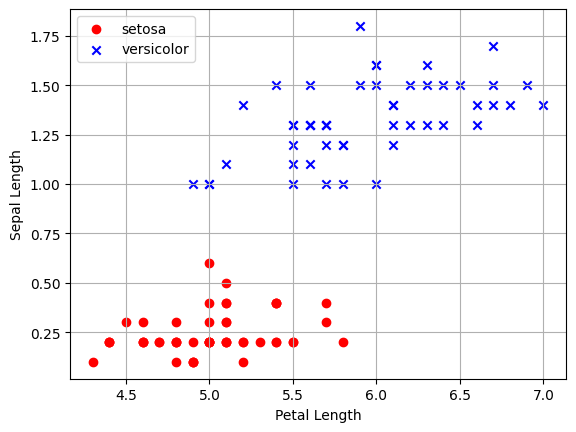

In [25]:
df = pd.read_csv('Iris.csv', header=None)

df[1] = pd.to_numeric(df[1], errors='coerce')
df[4] = pd.to_numeric(df[4], errors='coerce')

df = df.dropna(subset=[1,4])

setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 1, 4
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [26]:
df.head()

,0,1,2,3,4,5
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0


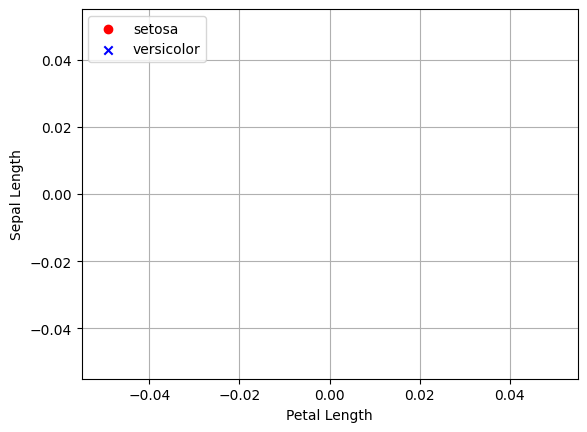

In [28]:
df = pd.read_csv('Iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### **Langkah 3 - Membuat Kelas Perceptron**

In [32]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**


In [33]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

### **Langkah 5 - Fitting Model**

In [34]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: can't multiply sequence by non-int of type 'float'

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

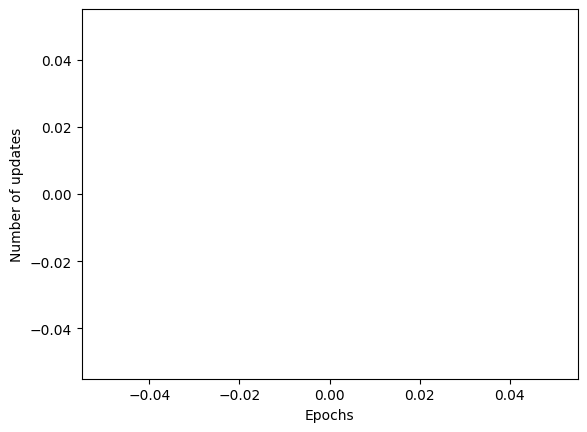

In [35]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualiasasi Decision Boundary**

In [36]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

In [37]:
# Menampilkan plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, ppn)
plt.title('Decision Region Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

<Figure size 1000x600 with 0 Axes>

# **Praktikum 2**

In [38]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [39]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [40]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# **Praktikum3**

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [43]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [44]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# **Praktikum4**

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [46]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [47]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [50]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
ann = tf.keras.models.Sequential()

In [54]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [55]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [56]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [57]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5558 - loss: 0.6608
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4886
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7917 - loss: 0.4561
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8050 - loss: 0.4295
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4126
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.3875
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3652
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.3589
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3644
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.3604
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3552
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [59]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[False]]


In [60]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1506   89]
 [ 193  212]]


0.859

In [62]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
# 1. Load Dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [64]:
# 2. Pra-pengolahan Data
def preprocess_data(X_train, X_test, y_train, y_test, use_pca=False, n_components=200):
    print("\nPra-pengolahan Data:")
    print("- Normalisasi")
    print("- Reshape")
    if use_pca:
        print("- PCA untuk reduksi dimensi")

    # Reshape data
    X_train = X_train.reshape(X_train.shape[0], 28*28)
    X_test = X_test.reshape(X_test.shape[0], 28*28)

    # Normalisasi menggunakan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Opsi PCA untuk reduksi dimensi
    if use_pca:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        print(f"- Variance explained: {np.sum(pca.explained_variance_ratio_):.4f}")

    # One-hot encoding untuk label
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

In [65]:
# 3. Membuat Model ANN
def create_model(input_shape, activation='relu', architecture=[512, 256, 128]):
    print("\nArsitektur Model:")
    print(f"- Input shape: {input_shape}")
    print(f"- Hidden layers: {architecture}")
    print(f"- Activation function: {activation}")

    model = Sequential()

    # Input layer
    model.add(Dense(architecture[0], activation=activation, input_shape=input_shape))
    model.add(Dropout(0.3))

    # Hidden layers
    for units in architecture[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    return model

In [66]:
# 4. Training dan Evaluasi
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Kompilasi model
    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    print("\nTraining Model...")
    # Training
    history = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)

    # Evaluasi
    print("\nEvaluasi Model:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np. argmax(y_test, axis=1)
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    return test_accuracy, cm

In [67]:
# 5. Visualisasi hasil
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Pra-pengolahan Data:
- Normalisasi
- Reshape
- PCA untuk reduksi dimensi
- Variance explained: 0.8674

Arsitektur Model:
- Input shape: (200,)
- Hidden layers: [512, 256, 128]
- Activation function: relu


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model...
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7351 - loss: 0.8555 - val_accuracy: 0.9498 - val_loss: 0.1735
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9260 - loss: 0.2549 - val_accuracy: 0.9607 - val_loss: 0.1375
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9464 - loss: 0.1854 - val_accuracy: 0.9656 - val_loss: 0.1320
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9551 - loss: 0.1509 - val_accuracy: 0.9693 - val_loss: 0.1137
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9620 - loss: 0.1329 - val_accuracy: 0.9696 - val_loss: 0.1123
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9667 - loss: 0.1178 - val_accuracy: 0.9722 - val_loss: 0.1031
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9684 - loss: 0.1047 - val_accuracy: 0.9708 - val_loss: 0.1082
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9726 - loss

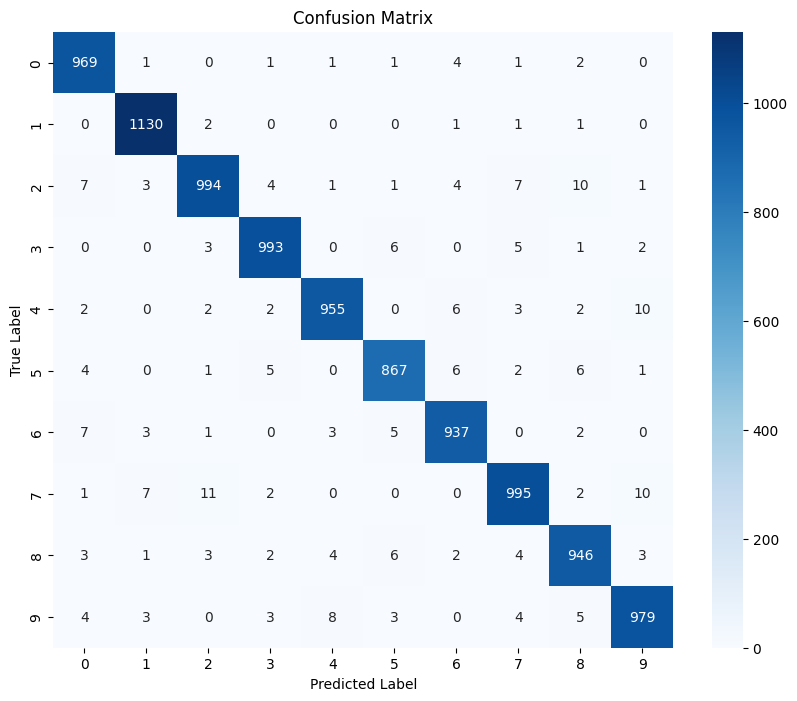

In [68]:
# Eksplorasi
use_pca = True
n_components = 200
input_shape = (n_components,) if use_pca else (784,)
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test, use_pca, n_components)
model = create_model(input_shape)
test_accuracy, cm = train_and_evaluate(model, X_train, X_test, y_train, y_test)
plot_confusion_matrix(cm)